In [133]:
import pandas as df
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df = df.read_csv("C://Users//doguy//Desktop//t_quake///turkey_earthquakes(1915-2021).csv",sep=';')

In [135]:
df.columns

Index(['No', 'Deprem Kodu', 'Olus tarihi', 'Olus zamani', 'Enlem', 'Boylam',
       'Derinlik', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Tip', 'Yer'],
      dtype='object')

In [136]:
df.rename(columns = {'ML':'Final'}, inplace = True)

In [137]:
df.head(5)

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,Final,Mw,Ms,Mb,Tip,Yer
0,1,2.021010e+13,2021.01.01,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ)
1,2,2.020120e+13,2020.12.31,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI
2,3,2.020120e+13,2020.12.30,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ
3,4,2.020120e+13,2020.12.30,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
4,5,2.020120e+13,2020.12.27,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [138]:
df.dtypes

No               int64
Deprem Kodu    float64
Olus tarihi     object
Olus zamani     object
Enlem          float64
Boylam         float64
Derinlik       float64
xM             float64
MD             float64
Final          float64
Mw             float64
Ms             float64
Mb             float64
Tip             object
Yer             object
dtype: object

In [139]:
for feature in df.columns[:]:
    print(feature,":",len(df[feature].unique()),'labels')

No : 17370 labels
Deprem Kodu : 1074 labels
Olus tarihi : 9675 labels
Olus zamani : 17252 labels
Enlem : 6599 labels
Boylam : 7962 labels
Derinlik : 659 labels
xM : 43 labels
MD : 44 labels
Final : 42 labels
Mw : 44 labels
Ms : 44 labels
Mb : 42 labels
Tip : 1 labels
Yer : 10442 labels


In [140]:
df.drop(['No', 'Deprem Kodu','Tip','Yer','Olus zamani','MD'], axis=1, inplace = True)

In [141]:
df.head(10)

,Olus tarihi,Enlem,Boylam,Derinlik,xM,Final,Mw,Ms,Mb
0,2021.01.01,35.9273,27.8658,26.1,3.9,3.9,3.7,0.0,0.0
1,2020.12.31,37.8435,26.7775,8.0,3.8,3.8,3.7,0.0,0.0
2,2020.12.30,36.4918,28.7092,5.0,3.9,3.7,3.9,0.0,0.0
3,2020.12.30,37.7960,26.4165,14.4,4.4,4.4,4.3,0.0,0.0
4,2020.12.27,38.4172,39.1482,5.0,3.9,3.7,3.9,0.0,0.0
5,2020.12.27,36.4750,28.7852,2.8,4.2,4.2,4.0,0.0,0.0
6,2020.12.27,38.5050,39.2180,2.9,5.6,5.6,5.6,0.0,0.0
7,2020.12.26,38.5305,39.2102,5.0,4.1,4.0,4.1,0.0,0.0
8,2020.12.26,38.0033,42.9642,5.0,3.9,3.8,3.9,0.0,0.0
9,2020.12.23,36.5213,28.6950,13.1,3.7,3.7,3.7,0.0,0.0


In [142]:
df['Yil'] = df['Olus tarihi'].str.split('.').str[0]
df['Ay'] = df['Olus tarihi'].str.split('.').str[1]
df['Gun'] = df['Olus tarihi'].str.split('.').str[2]

In [143]:
df.head()

,Olus tarihi,Enlem,Boylam,Derinlik,xM,Final,Mw,Ms,Mb,Yil,Ay,Gun
0,2021.01.01,35.9273,27.8658,26.1,3.9,3.9,3.7,0.0,0.0,2021,01,01
1,2020.12.31,37.8435,26.7775,8.0,3.8,3.8,3.7,0.0,0.0,2020,12,31
2,2020.12.30,36.4918,28.7092,5.0,3.9,3.7,3.9,0.0,0.0,2020,12,30
3,2020.12.30,37.7960,26.4165,14.4,4.4,4.4,4.3,0.0,0.0,2020,12,30
4,2020.12.27,38.4172,39.1482,5.0,3.9,3.7,3.9,0.0,0.0,2020,12,27


In [144]:
df.isnull().sum()

Olus tarihi        0
Enlem              0
Boylam             0
Derinlik           0
xM                 0
Final              0
Mw             12725
Ms                 0
Mb                 0
Yil                0
Ay                 0
Gun                0
dtype: int64

In [145]:
# ML [Final column] is the most Trustworthy tham Mw and Ms also Mw has lots of NaN value, that's why I Will use ML as a Independent value
#df.drop(['Mw'],axis=1,inplace=True)
#df.drop(['Olus tarihi','Ms'],axis =1 , inplace=True)
#df.drop(['Mw'],axis=1,inplace=True)
df.head()

,Olus tarihi,Enlem,Boylam,Derinlik,xM,Final,Mw,Ms,Mb,Yil,Ay,Gun
0,2021.01.01,35.9273,27.8658,26.1,3.9,3.9,3.7,0.0,0.0,2021,01,01
1,2020.12.31,37.8435,26.7775,8.0,3.8,3.8,3.7,0.0,0.0,2020,12,31
2,2020.12.30,36.4918,28.7092,5.0,3.9,3.7,3.9,0.0,0.0,2020,12,30
3,2020.12.30,37.7960,26.4165,14.4,4.4,4.4,4.3,0.0,0.0,2020,12,30
4,2020.12.27,38.4172,39.1482,5.0,3.9,3.7,3.9,0.0,0.0,2020,12,27


<AxesSubplot:>

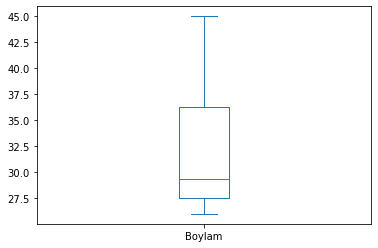

In [150]:
df['Boylam'].plot(kind='box')
#Normal Distribution NO OUTLIER

<AxesSubplot:>

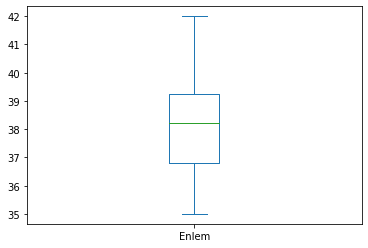

In [147]:
df['Enlem'].plot(kind = 'box')
#Normal Distribution NO OUTLIER

In [152]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[["Enlem","Boylam"]] = min_max_scaler. fit_transform(df[["Enlem","Boylam"]])

In [155]:
df.drop(['Olus tarihi'],axis=1,inplace=True)
df.head()

,Enlem,Boylam,Derinlik,xM,Final,Mw,Ms,Mb,Yil,Ay,Gun
0,0.132506,0.098204,26.1,3.9,3.9,3.7,0.0,0.0,2021,01,01
1,0.406319,0.040923,8.0,3.8,3.8,3.7,0.0,0.0,2020,12,31
2,0.213169,0.142595,5.0,3.9,3.7,3.9,0.0,0.0,2020,12,30
3,0.399531,0.021922,14.4,4.4,4.4,4.3,0.0,0.0,2020,12,30
4,0.488297,0.692040,5.0,3.9,3.7,3.9,0.0,0.0,2020,12,27


In [171]:
df['Yil'] = df['Yil'].apply(int)
df['Ay'] = df['Ay'].apply(int)
df['Gun'] = df['Gun'].apply(int)
df.dtypes

Enlem       float64
Boylam      float64
Derinlik    float64
xM          float64
Final       float64
Mw          float64
Ms          float64
Mb          float64
Yil           int64
Ay            int64
Gun           int64
dtype: object

In [186]:
decimals = 3   
df['Enlem'] = df['Enlem'].apply(lambda x: round(x, decimals))
df['Boylam'] = df['Boylam'].apply(lambda x: round(x, decimals))
df.head()

,Enlem,Boylam,Derinlik,xM,Final,Mw,Ms,Mb,Yil,Ay,Gun
0,0.133,0.098,26.1,3.9,3.9,3.7,0.0,0.0,2021,1,1
1,0.406,0.041,8.0,3.8,3.8,3.7,0.0,0.0,2020,12,31
2,0.213,0.143,5.0,3.9,3.7,3.9,0.0,0.0,2020,12,30
3,0.400,0.022,14.4,4.4,4.4,4.3,0.0,0.0,2020,12,30
4,0.488,0.692,5.0,3.9,3.7,3.9,0.0,0.0,2020,12,27


# MACHINE LEARNING

In [193]:
X = df.drop(['Final'],axis=1)
y = df.Final

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### LINEAR REGRESSION

In [197]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [198]:
regressor.fit(X_train, y_train)

LinearRegression()

In [199]:
print(regressor.intercept_)

-130.88196669566622


In [201]:
regressor.score(X_train, y_train)

0.398164396821717

### DECISION TREE 

In [211]:
from sklearn.tree import DecisionTreeRegressor
decision = DecisionTreeRegressor(random_state=0)

In [212]:
decision.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [215]:
decision.score(X_train,y_train)

1.0